In [5]:
import tdm_loader
from datetime import datetime
import re
import pandas as pd
import xmltodict, json
import numpy as np
import os

In [6]:
base_dir = '/home/kasper/Dropbox/George Maria/PTRMS 24-26NOV2020/'
file_name = '24nov2020.tdm'
mz_label = 'm/z 95.00 ch29'
file_summary_name ='24nov2020_Summary.txt'

In [7]:
with open(base_dir+file_name) as xml_file:
    data_dict = xmltodict.parse(xml_file.read())

with open(base_dir+"{0}.json".format(file_name), "w") as json_file: 
    json.dump(data_dict, json_file) 

In [8]:
data_file = tdm_loader.OpenFile(base_dir+file_name)

In [9]:
m_z_data = data_file.channel_dict(2)[mz_label]

nrows = m_z_data.shape[0]

In [10]:
summary=open(base_dir+file_summary_name, "r")

times = [t for t in summary.readlines() if 'Start Time' in t or 'Stop Time' in t]

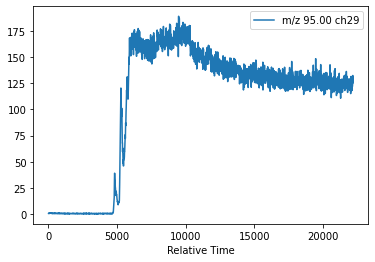

In [12]:
start_time_m = times[0]
stop_time_m = times[1]

start_time_m1 = re.sub('[^A-Za-z0-9]+', ' ', start_time_m).split(' ')[-7:-1]
stop_time_m1 = re.sub('[^A-Za-z0-9]+', ' ', stop_time_m).split(' ')[-7:-1]


start_datetime_string = ' '.join(start_time_m1)
stop_datetime_string = ' '.join(stop_time_m1)

start_datetime_datetime = datetime.strptime(start_datetime_string, '%B %d %Y %H %M %S')
stop_datetime_datetime = datetime.strptime(stop_datetime_string, '%B %d %Y %H %M %S')




with open(base_dir+"{0}.json".format(file_name), "r") as json_file: 
    data = json.load(json_file) 

tdm_channel_list = data['usi:tdm']['usi:data']['tdm_channel']

relative_time_dict = [td for td in tdm_channel_list if td['name']=='Relative Time'][0]

absolute_time_dict = [td for td in tdm_channel_list if td['name']=='Absolute Time'][0]

relative_time_minimum = float(relative_time_dict['minimum'])
relative_time_maximum = float(relative_time_dict['maximum'])






time_step = round((stop_datetime_datetime-start_datetime_datetime).seconds/nrows, 3)

timesteps = np.linspace(relative_time_minimum, relative_time_maximum, num=nrows).round(3)

index = pd.Index(timesteps, name='Relative Time')

data_mz = pd.DataFrame(m_z_data, index=index, columns=[mz_label]).plot()

In [ ]:
#list(data_file.channel_dict(1).keys())

In [ ]:
#data_file.channel(channel_group, channel)

da = data_file.channel(1, 6)


In [ ]:
start_time_m1 = re.sub('[^A-Za-z0-9]+', ' ', start_time_m).split(' ')[-7:-1]
stop_time_m1 = re.sub('[^A-Za-z0-9]+', ' ', stop_time_m).split(' ')[-7:-1]


In [ ]:
start_datetime_string = ' '.join(start_time_m1)
stop_datetime_string = ' '.join(stop_time_m1)

In [ ]:
start_datetime_datetime = datetime.strptime(start_datetime_string, '%B %d %Y %H %M %S')
stop_datetime_datetime = datetime.strptime(stop_datetime_string, '%B %d %Y %H %M %S')


In [ ]:
time_step = round((stop_datetime_datetime-start_datetime_datetime).seconds/nrows, 2)

In [ ]:
time_step

In [ ]:

timesteps = np.linspace(relative_time_minimum, relative_time_maximum, num=nrows).shape[0]

In [ ]:
tdm_channel_list = data['usi:tdm']['usi:data']['tdm_channel']

In [ ]:
relative_time_dict = [td for td in tdm_channel_list if td['name']=='Relative Time'][0]

In [ ]:
absolute_time_dict = [td for td in tdm_channel_list if td['name']=='Absolute Time'][0]

In [ ]:
relative_time_minimum = float(relative_time_dict['minimum'])
relative_time_maximum = float(relative_time_dict['maximum'])

In [ ]:
(relative_time_maximum-relative_time_minimum)/nrows

In [ ]:
np.linspace(relative_time_minimum, relative_time_maximum, num=nrows).shape[0]

In [ ]:
df['Relative Time2'] = np.linspace(relative_time_minimum, relative_time_maximum, num=nrows).round(3)

In [ ]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_theme()

base_dir = '/home/kasper/Dropbox/George Maria/'

file_name = '/home/kasper/Dropbox/George Maria/Phenol for Maria (1).xlsx'

import xlrd
import numpy as np

workbook = xlrd.open_workbook(file_name)
SheetNameList = workbook.sheet_names()
for i in np.arange( len(SheetNameList) ):
    print( SheetNameList[i] )

import os

sheet_names = workbook.sheet_names()
print('Sheet Names', sheet_names)

for s in sheet_names:
    os.makedirs(base_dir+'{0}'.format(s), exist_ok=True)

# for s, sheet_name in enumerate(sheet_names):
s=0

# print('Generating Graphs for Sheet: ', sheet_name)
xl_sheet = workbook.sheet_by_name(sheet_names[s])

header = [x.value for x in xl_sheet.row(0)]

data = []
for r in range(1, xl_sheet.nrows):
    data.append([x.value for x in xl_sheet.row(r)])

header = [x.replace('/','_') for x in header]

df = pd.DataFrame(data, columns = header)

df.index = df['Relative Time']


In [ ]:
((df.loc[df.index[-1]]['Relative Time'] - df.loc[df.index[0]]['Relative Time'])/df.shape[0]).round(2)

In [ ]:
df['Relative Time'].diff().mean().round(2)

In [ ]:
# import datetime
your_timestamp = 63773375203.0718
date = datetime.fromtimestamp(your_timestamp)

In [ ]:
serial = your_timestamp
seconds = (serial - 25569) * 86400.0
datetime.utcfromtimestamp(seconds)
# datetime.datetime(2018, 1, 11, 0, 0)

In [ ]:
import xlrd

In [ ]:
json_data = json.dumps(data_dict)


In [ ]:
xml_file.close()

In [ ]:
tdm_data_dom_element.getElementsByTagName()

In [ ]:
tdm_data_dom_element = tdm_dom_element.childNodes[7]

In [ ]:
tdm_dom_element = xmldoc.childNodes[0]

In [ ]:
titemlist = xmldoc.get('usi10')
# print(len(itemlist))
# print(itemlist[0].attributes['name'].value)
# for s in itemlist:
#     print(s.attributes['name'].value)

In [ ]:
from xml.dom import minidom
xmldoc = minidom.parse('24nov2020.tdm')

In [ ]:
ttt

In [ ]:
ttt = r[tt.index].std(0)>0
ttt = ttt[ttt!=False]

In [ ]:
tt = (column_sum!=0)
tt = tt[tt!=False]

In [ ]:
r[[c for c in column_sum!=0 if c==True]]

In [ ]:
column_sum = r.sum(0)

In [ ]:
r = pd.DataFrame(das).T

In [ ]:
len(das)

In [ ]:
das = []
for cg in range(1,200):
    for c in range(1,200):
        try:
            das.append(data_file.channel(cg, c))
        except:
            pass

In [ ]:
da[1]-find_nearest(nears,da[1])

In [ ]:
nears = []
for c in df.columns[3:]:
    near = find_nearest( df[c].values, da[1])
    nears.append(near)

In [ ]:
find_nearest( df[c].values, da[0])

In [ ]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [ ]:
import numpy as np

In [ ]:
da[1]

In [ ]:
import re

In [ ]:
start_time_m.rstrip().split(' ')[-6:]

In [ ]:
start_time_m.strip('\t')

In [ ]:
datetime.strptime(stop_datetime, '%B %d %Y %H %M %S')


In [ ]:
datetime.strptime('Jan', '%b')
datetime(1900, 1, 1, 0, 0)
datetime.strptime('Aug', '%b')
datetime(1900, 8, 1, 0, 0)
datetime.strptime('Jan 15 2015', '%b %d %Y')
datetime(2015, 1, 15, 0, 0)

In [ ]:
[t for t in summary.readlines() if 'Start Time' in t or 'Stop Time' in t]